<a href="https://colab.research.google.com/github/subbu1403/intership/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [ ]:
data=pd.read_csv('/content/Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
x=data.drop(columns=['price','guestroom','hotwaterheating','airconditioning','prefarea'])
y=data['price']

In [ ]:
print("input given:")
x

input given:


,area,bedrooms,bathrooms,stories,mainroad,basement,parking,furnishingstatus
0,7420,4,2,3,yes,no,2,furnished
1,8960,4,4,4,yes,no,3,furnished
2,9960,3,2,2,yes,yes,2,semi-furnished
3,7500,4,2,2,yes,yes,3,furnished
4,7420,4,1,2,yes,yes,2,furnished
...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,yes,2,unfurnished
541,2400,3,1,1,no,no,0,semi-furnished
542,3620,2,1,1,yes,no,0,unfurnished
543,2910,3,1,1,no,no,0,furnished


In [ ]:
print("output required:")
y

output required:


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['mainroad', 'basement','furnishingstatus']
encoders = {}
for column in columns_to_encode:
    encoder = LabelEncoder()
    x[column] = encoder.fit_transform(data[column])
    encoders[column] = encoder

In [ ]:
x.describe()

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.350459,0.693578,1.069725
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.477552,0.861586,0.761373
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,3.000000,2.000000


In [ ]:
x.corr().round(2)

,area,bedrooms,bathrooms,stories,mainroad,basement,parking,furnishingstatus
area,1.00,0.15,0.19,0.08,0.29,0.05,0.35,-0.17
bedrooms,0.15,1.00,0.37,0.41,-0.01,0.10,0.14,-0.12
bathrooms,0.19,0.37,1.00,0.33,0.04,0.10,0.18,-0.14
stories,0.08,0.41,0.33,1.00,0.12,-0.17,0.05,-0.10
mainroad,0.29,-0.01,0.04,0.12,1.00,0.04,0.20,-0.16
basement,0.05,0.10,0.10,-0.17,0.04,1.00,0.05,-0.11
parking,0.35,0.14,0.18,0.05,0.20,0.05,1.00,-0.18
furnishingstatus,-0.17,-0.12,-0.14,-0.10,-0.16,-0.11,-0.18,1.00


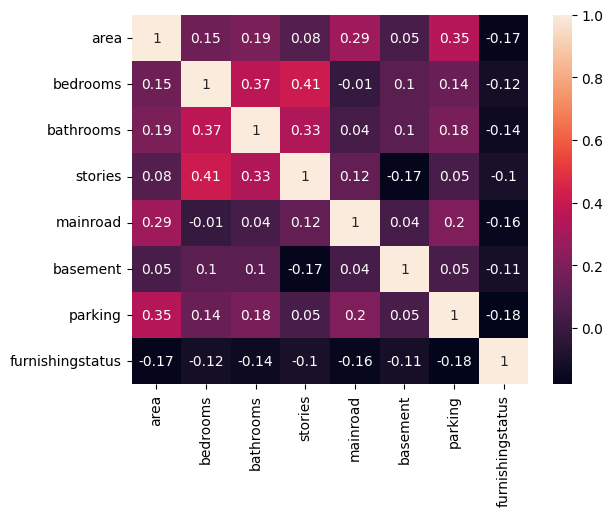

In [ ]:
import seaborn as sns
sns.heatmap(x.corr().round(2),annot=True)
plt.show()

In [ ]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size= 0.2, random_state= 42)

In [ ]:
from sklearn.linear_model import LinearRegression
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
Lin_reg.score(X_train,y_train)

0.6247038521232273

In [ ]:
Lin_reg.score(X_test,y_test)

0.5714528322005137

In [ ]:
y_pred=Lin_reg.predict(X_test)

In [ ]:
table=pd.DataFrame({"Y_test":y_test,"Y_pred":y_pred})
table

,Y_test,Y_pred
316,4060000,5.805567e+06
77,6650000,6.474138e+06
360,3710000,3.228126e+06
90,6440000,4.146890e+06
493,2800000,3.557974e+06
...,...,...
15,9100000,5.759857e+06
357,3773000,4.816536e+06
39,7910000,7.007917e+06
54,7350000,5.808811e+06


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
print("Mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("Mean_squared_error:",mean_squared_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))

Mean_absolute_error: 1118844.2550173702
Mean_squared_error: 2166121763521.0151
mean_absolute_percentage_error: 0.24728488491947254


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state=52)
regr.fit(X_train,y_train)

RandomForestRegressor(random_state=52)

In [ ]:
regr.score(X_train,y_train)
regr.score(X_test,y_test)
ry_pred=regr.predict(X_test)


In [ ]:
cdf=pd.DataFrame({'Y_test':y_test,'Y_pred':ry_pred})
cdf

,Y_test,Y_pred
316,4060000,6719160.0
77,6650000,6339340.0
360,3710000,3719660.0
90,6440000,4460120.0
493,2800000,3554985.0
...,...,...
15,9100000,7907690.0
357,3773000,6000470.0
39,7910000,6713910.0
54,7350000,7252420.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
print("Mean_absolute_error:",mean_absolute_error(y_test,ry_pred))
print("Mean_squared_error:",mean_squared_error(y_test,ry_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,ry_pred))

Mean_absolute_error: 1092279.7752293579
Mean_squared_error: 2236167860072.007
mean_absolute_percentage_error: 0.23684671746937183


In [ ]:
x=data.drop(columns=['price','guestroom','hotwaterheating','airconditioning','prefarea'])
y=data['price']
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['mainroad', 'basement','furnishingstatus']
encoders = {}
for column in columns_to_encode:
    encoder = LabelEncoder()
    x[column] = encoder.fit_transform(x[column])
    encoders[column] = encoder
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
def regression_pipeline(x, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    models = [
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(),
    KNeighborsRegressor(),
    BayesianRidge(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    Lars(),
    OrthogonalMatchingPursuit()
]
    warnings.filterwarnings("ignore", category=FutureWarning)
    model_names = []
    scores = []
    R2= []
    MSE=[]
    MAE=[]
    RMSE=[]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test,y_pred)
        accu = model.score(X_test,y_test)*100
        model_names.append(type(model))
        scores.append(accu * 100)
        R2.append(r2)
        MSE.append(mse)
        MAE.append(mae)
        RMSE.append(rmse)
        print('Model:', type(model))
        print('MSE:', mse)
        print('RMSE:', rmse)
        print('R-squared:', r2)
        print("MAE",mae)
        print("score:",accu)
        print('-----------------------------')
regression_pipeline(x,y)

Model: <class 'sklearn.linear_model._ridge.Ridge'>
MSE: 2165169668747.7107
RMSE: 1471451.5516141572
R-squared: 0.571641195350475
MAE 1118294.4623398385
score: 57.1641195350475
-----------------------------
Model: <class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 2166122197772.1921
RMSE: 1471775.1858800284
R-squared: 0.5714527462879325
MAE 1118844.2702612935
score: 57.14527462879325
-----------------------------
Model: <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
MSE: 2517967761358.088
RMSE: 1586810.5625304137
R-squared: 0.5018433539089677
MAE 1186456.479916232
score: 50.18433539089677
-----------------------------
Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE: 3103093723093.578
RMSE: 1761560.0254017964
R-squared: 0.3860815911444886
MAE 1273528.623853211
score: 38.60815911444886
-----------------------------
Model: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
MSE: 2036301207226.5706
RMSE: 1426990.2617840706
R-squared: 0.5971366

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Model: <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
MSE: 28273384647480.543
RMSE: 5317272.293900373
R-squared: -4.593627800077136
MAE 4836126.829950038
score: -459.3627800077136
-----------------------------
Model: <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
MSE: 3235085323027.523
RMSE: 1798634.2938539572
R-squared: 0.35996827319643865
MAE 1308942.2018348624
score: 35.99682731964386
-----------------------------
Model: <class 'sklearn.linear_model._bayes.BayesianRidge'>
MSE: 3679391373267.0386
RMSE: 1918173.9684572509
R-squared: 0.2720664282157498
MAE 1475714.0907258736
score: 27.206642821574977
-----------------------------
Model: <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
MSE: 2634159047711.6157
RMSE: 1623009.256816367
R-squared: 0.47885598194847145
MAE 1222763.4815100667
score: 47.88559819484715
-----------------------------
Model: <class 'sklearn.ensemble._bagging.BaggingRegressor'>
MSE: 2525661339621.507
RMSE: 1589232.9406

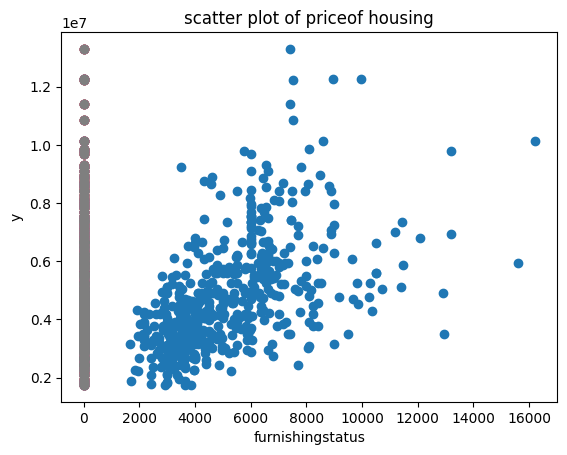

In [ ]:
column = ['area'	,'bedrooms',	'bathrooms',	'stories',	'mainroad',	'basement',	'parking',	'furnishingstatus']
import matplotlib.pyplot as plt
for col in column:
  plt.scatter(x[col],y)
  plt.title("scatter plot of priceof housing")
  plt.xlabel(f'{col}')
  plt.ylabel('y')